In [1]:
import pandas as  pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import chardet 

In [2]:
df = pd.read_csv("jira_sfdc_prev.csv")
df

,POSID,JIRA KEY,ENGAGEMENT TYPE,USE CASE1,USE CASE2,USE CASE3,ASSIGNEE,JIRA CREATED,JIRA STATUS,JIRA RESOLVED,...,TECH WIN METHOD,AMOUNT,STAGE,OPP CLOSE,OPP USE CASE,PHYSICAL SOLUTION,CLOUD SOLUTION,REASON LOST,ACCOUNT,TOOLS USED
0,POS0137724,SOL-2170,Validation,Get reliable data access for tools,NaN,NaN,NaN,nbodla,2/2/22 16:26,Done,...,NaN,100000.00,4 - Value Demonstration,8/11/23,NPM/APM; Cloud NPM/APM,DeDupe; Tunneling; AFI/AMI; FM,NaN,NaN,"Five 9,",NaN
1,POS0122398,SOL-2284,Validation,Get reliable data access for tools,NaN,NaN,NaN,nbodla,3/30/22 19:32,Done,...,No POC Required,369795.08,2 - Discover,9/21/23,NPM/APM; OOB Security,NaN,NaN,NaN,Select Medical Holdings,Forcepoint; ForeScout; NetScout (Fluke); Trend...
2,POS0145774,SOL-2444,Validation,Visibility in private clouds,NaN,NaN,NaN,sprakash,6/23/22 3:54,Done,...,NaN,36180.00,8 - Booked,9/21/22,Cloud Security,NaN,VMWare,NaN,Alcohol and Tobacco Tax and Trade Bureau,NaN
3,POS0106650,SOL-2491,Validation,Subscriber-Aware Visibility,NaN,NaN,NaN,authirapathi,7/14/22 21:49,Done,...,Onsite,2500000.00,Lost,8/24/22,NaN,NaN,NaN,Company Strategy,"T-Mobile,",NaN
4,POS0150030,SOL-2609,Validation,Subscriber-Aware Visibility,NaN,NaN,NaN,frosell,9/6/22 11:17,Done,...,NaN,13000039.27,8 - Booked,12/22/22,NaN,NaN,NaN,NaN,"T-Mobile,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,POS0097744,SOL-2469,Automation,Visibility in public clouds,NaN,NaN,NaN,sriramk,7/5/22 13:02,Done,...,NaN,157140.01,2 - Discover,9/30/23,NaN,NaN,NaN,NaN,TOTAL SA,NaN
160,POS0145884,SOL-2632,Automation,Inline bypass,NaN,NaN,NaN,sriramk,9/16/22 13:11,Done,...,Onsite,111390.88,8 - Booked,1/11/23,NPM/APM; Inline Security,Tap & Agg; SSL/TLS; FM; Inline Bypass,NaN,NaN,E.Sun bank - ????,Imperva (SecureSphere); NetScout (Fluke)
161,POS0154703,SOL-2633,Automation,Get reliable data access for tools,NaN,NaN,NaN,sriramk,9/16/22 13:18,Done,...,NaN,1800000.00,5 - Negotiation,11/30/23,OOB Security,Header Stripping,NaN,NaN,Cox Communications,Procera
162,POS0140741,SOL-2821,Automation,Visibility in public clouds,NaN,NaN,NaN,sriramk,1/25/23 17:23,Done,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Analyzing the reason lost column

# First will examine the top reasons why deal was lost
lost = df['REASON LOST'].value_counts()
lost_df = pd.DataFrame(lost)

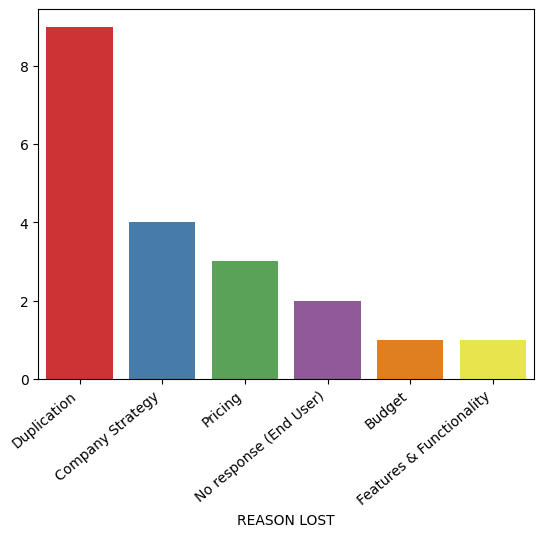

<Figure size 800x400 with 0 Axes>

In [4]:
ax = sns.barplot(x = lost.index, y = lost.values, palette = 'Set1')
plt.figure(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Given the data, duplication has resulted in the highest numnber of deals lost

In [5]:
# Will analyze alongside the use case column

use_case = df[["REASON LOST","USE CASE1"]].dropna(axis = 0)
use_case_lost = use_case["USE CASE1"].value_counts()
pd.DataFrame(use_case_lost)

,count
USE CASE1,
Get reliable data access for tools,6
Application Filtering Intelligence,5
Extract network metadata,3
Encrypted traffic management,3
Subscriber-Aware Visibility,1
Visibility in public clouds,1
Centralized NetFlow/IPFIX,1


In [6]:
grouped = use_case.groupby(['REASON LOST', 'USE CASE1']).size().reset_index(name='Count')
grouped.sort_values("Count", ascending = False)

,REASON LOST,USE CASE1,Count
9,Duplication,Get reliable data access for tools,5
13,Pricing,Application Filtering Intelligence,2
0,Budget,Extract network metadata,1
1,Company Strategy,Application Filtering Intelligence,1
2,Company Strategy,Encrypted traffic management,1
3,Company Strategy,Get reliable data access for tools,1
4,Company Strategy,Subscriber-Aware Visibility,1
5,Duplication,Application Filtering Intelligence,1
6,Duplication,Centralized NetFlow/IPFIX,1
7,Duplication,Encrypted traffic management,1


Asides from the use case of 'Getting reliable data access for tools' and Duplication, the type of use case seems to not be associated with any particular reason lost

In [7]:
# looking at the customer's that were lost and the reason associated with them 

'''
grouped_customers = df.groupby(['ACCOUNT', 'REASON LOST'])
grouped_customers'''

"\ngrouped_customers = df.groupby(['ACCOUNT', 'REASON LOST'])\ngrouped_customers"

In [8]:
acct_lost = df[["REASON LOST","ACCOUNT"]].dropna(axis = 0)
acct_lost

,REASON LOST,ACCOUNT
3,Company Strategy,"T-Mobile,"
7,Duplication,Total Quality Logistics
22,Budget,NTT Communications India Network Services Priv...
37,Features & Functionality,Adobe Systems India Private Limited
39,Pricing,Elite Semiconductor Microelectronics Technolog...
40,No response (End User),"National Basketball Association,Armis"
41,Company Strategy,Wells Fargo Bank (Global Acct)
50,Company Strategy,Citigroup Inc.
55,Duplication,"T-Mobile,"
66,Duplication,"T-Mobile,"


In [9]:
loss = pd.DataFrame(acct_lost.groupby(["ACCOUNT", "REASON LOST"]).size())
loss.sort_values(0, ascending = False)

,,0
ACCOUNT,REASON LOST,
"T-Mobile,",Duplication,2
Electric Reliability Council of Texas - ERCOT,Pricing,2
Adobe Systems India Private Limited,Features & Functionality,1
Veterans Affairs (VA) - AITC & CDM,No response (End User),1
US Social Security Administration - SSA,Duplication,1
US Federal - D,Duplication,1
Total Quality Logistics,Duplication,1
"The PNC Financial Services Group,",Duplication,1
"T-Mobile,z - Not on list (pls update SFDC Team)",Duplication,1


In [10]:
cust_engagement = df[["ENGAGEMENT TYPE", "AMOUNT", "USE CASE1", "ACCOUNT"]]
cust_engagement

,ENGAGEMENT TYPE,AMOUNT,USE CASE1,ACCOUNT
0,Validation,100000.00,Get reliable data access for tools,"Five 9,"
1,Validation,369795.08,Get reliable data access for tools,Select Medical Holdings
2,Validation,36180.00,Visibility in private clouds,Alcohol and Tobacco Tax and Trade Bureau
3,Validation,2500000.00,Subscriber-Aware Visibility,"T-Mobile,"
4,Validation,13000039.27,Subscriber-Aware Visibility,"T-Mobile,"
...,...,...,...,...
159,Automation,157140.01,Visibility in public clouds,TOTAL SA
160,Automation,111390.88,Inline bypass,E.Sun bank - ????
161,Automation,1800000.00,Get reliable data access for tools,Cox Communications
162,Automation,NaN,Visibility in public clouds,NaN


In [11]:
cust = cust_engagement[["ENGAGEMENT TYPE", "AMOUNT"]]
cust = cust.groupby('ENGAGEMENT TYPE').mean()
cust["AMOUNT"] = cust['AMOUNT'].astype('int')
cust.sort_values("AMOUNT", ascending = False)

,AMOUNT
ENGAGEMENT TYPE,
Validation,1364506
Demo,1141652
Sizing,1097148
POC,692368
Automation,522793
Design Review,448464
Post-Sales,102072


We see that validation is the engagement type that contributes the highest amount, by far; whearas Post-Sales is the lease

In [12]:
cust_engagement

,ENGAGEMENT TYPE,AMOUNT,USE CASE1,ACCOUNT
0,Validation,100000.00,Get reliable data access for tools,"Five 9,"
1,Validation,369795.08,Get reliable data access for tools,Select Medical Holdings
2,Validation,36180.00,Visibility in private clouds,Alcohol and Tobacco Tax and Trade Bureau
3,Validation,2500000.00,Subscriber-Aware Visibility,"T-Mobile,"
4,Validation,13000039.27,Subscriber-Aware Visibility,"T-Mobile,"
...,...,...,...,...
159,Automation,157140.01,Visibility in public clouds,TOTAL SA
160,Automation,111390.88,Inline bypass,E.Sun bank - ????
161,Automation,1800000.00,Get reliable data access for tools,Cox Communications
162,Automation,NaN,Visibility in public clouds,NaN


In [13]:
customer_amounts = cust_engagement[["AMOUNT", "ACCOUNT"]].groupby('ACCOUNT').mean()
# converting to type int

customer_amounts["AMOUNT"] = customer_amounts["AMOUNT"].dropna(axis = 0).astype('int')
customer_amounts

,AMOUNT
ACCOUNT,
Cascade,271828.0
"DS5150)""",22641.0
Iron Port,626568.0
ANDORRA TELECOM SAU,364926.0
ASIAN DEVELOPMENT BANK,17520.0
...,...
Vodafone Group Services Ltd. (UK),100000.0
Wells Fargo Bank (Global Acct),1635515.0
"World Wrestling Entertainment,LiveAction",113258.0


In [14]:
customer_amounts = customer_amounts.sort_values("AMOUNT", ascending = False)
customer_amounts.dropna()

,AMOUNT
ACCOUNT,
Veterans Affairs (VA) - AITC & CDM,24611599.0
"T-Mobile,",4900009.0
USMC - Marine Corps Systems Command - MCSC,4558776.0
"T-Mobile,z - Not on list (pls update SFDC Team)",4199778.0
NTT Communications India Network Services Private Limited,3976927.0
...,...
ASIAN DEVELOPMENT BANK,17520.0
Ferretti S.p.A.,12870.0
AXA Insurance UK PLC,12285.0


In [15]:
top_accounts = customer_amounts.head(10)
top_accounts

,AMOUNT
ACCOUNT,
Veterans Affairs (VA) - AITC & CDM,24611599.0
"T-Mobile,",4900009.0
USMC - Marine Corps Systems Command - MCSC,4558776.0
"T-Mobile,z - Not on list (pls update SFDC Team)",4199778.0
NTT Communications India Network Services Private Limited,3976927.0
MUFG N.A.,2677997.0
Wells Fargo Bank (Global Acct),1635515.0
"Charter Communications,Infovista; NetScout (Fluke)",1595523.0
ETISALAT EGYPT,1497088.0


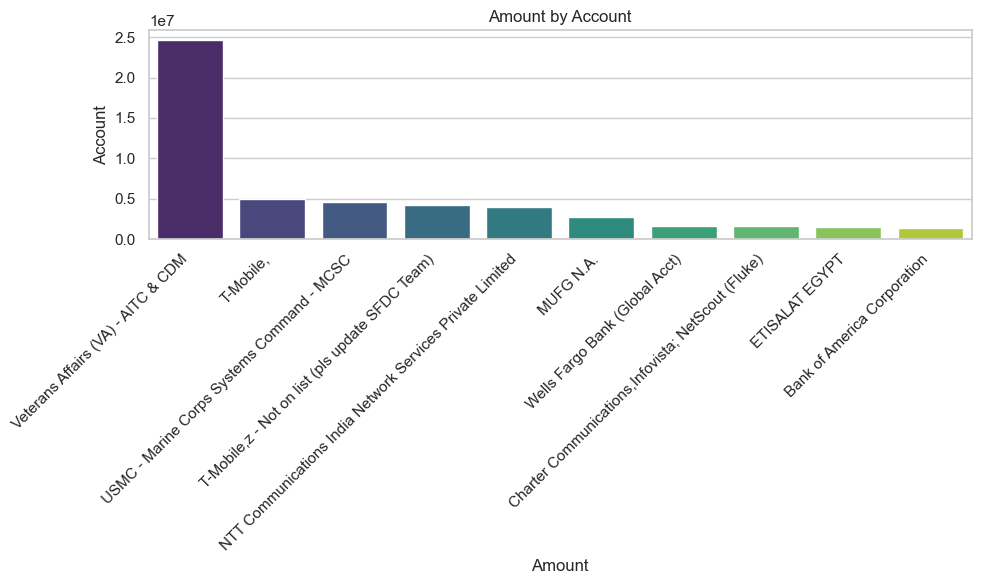

In [16]:

sns.set(style='whitegrid')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.index, y='AMOUNT', data=top_accounts, palette='viridis')

plt.title('Amount by Account')
plt.xlabel('Amount')
plt.ylabel('Account')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

In [17]:
# Use Case by Amount
use_case = df[["USE CASE1", "AMOUNT"]].groupby('USE CASE1').mean()

use_case["AMOUNT"] = use_case["AMOUNT"].dropna(axis = 0).astype('int')

use_case.sort_values("AMOUNT", ascending = False)



,AMOUNT
USE CASE1,
Subscriber-Aware Visibility,4003986
Extract network metadata,2711449
Centralized NetFlow/IPFIX,1495907
Visibility into remote sites,836415
Inline bypass,815438
Application Filtering Intelligence,718882
Get reliable data access for tools,562521
Encrypted traffic management,494230
Visibility in private clouds,165979


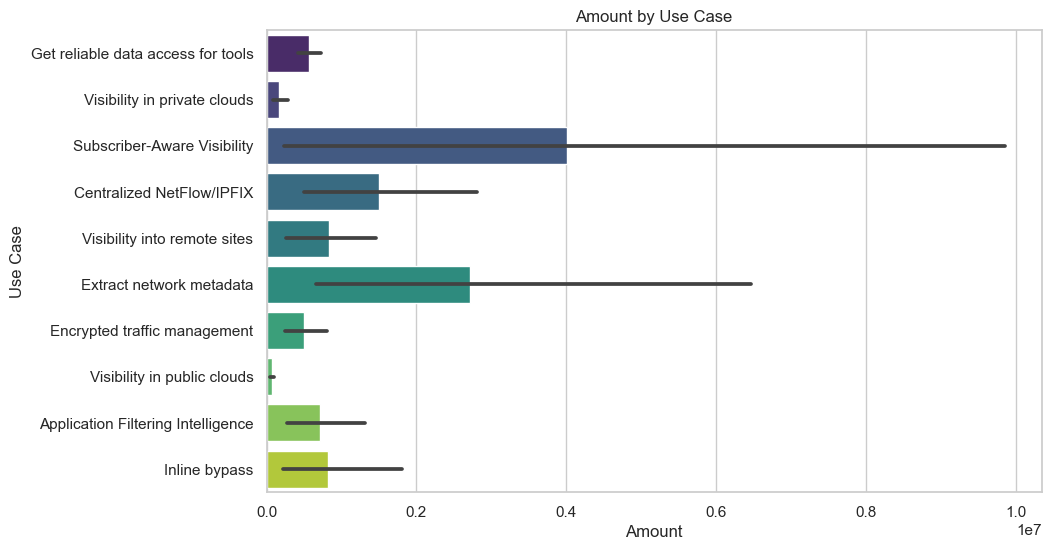

In [18]:


plt.figure(figsize=(10, 6))
sns.barplot(x='AMOUNT', y='USE CASE1', data=df, palette='viridis')

plt.title('Amount by Use Case')
plt.xlabel('Amount')
plt.ylabel('Use Case')

plt.show()


In [19]:
# Time to Resolution Analysis

#df[['JIRA STATUS', 'JIRA RESOLVED', 'JIRA CREATED']]
df.columns

Index(['POSID', 'JIRA KEY', 'ENGAGEMENT TYPE', 'USE CASE1', 'USE CASE2',
       'USE CASE3', 'ASSIGNEE', 'JIRA CREATED', 'JIRA STATUS', 'JIRA RESOLVED',
       'JIRA REGION', 'JIRA COMPONENT', 'OPP OWNER', 'DIVISION', 'SUBDIVISION',
       'SUBREGION', 'SUBTERRITORY', 'OPP TYPE', 'TECH WIN STATUS',
       'TECH WIN METHOD', 'AMOUNT', 'STAGE', 'OPP CLOSE', 'OPP USE CASE',
       'PHYSICAL SOLUTION', 'CLOUD SOLUTION', 'REASON LOST', 'ACCOUNT',
       'TOOLS USED'],
      dtype='object')

In [26]:
# opportunity analysis 
df[["JIRA STATUS", "STAGE", "OPP CLOSE", "AMOUNT"]]

,JIRA STATUS,STAGE,OPP CLOSE,AMOUNT
0,2/2/22 16:26,4 - Value Demonstration,8/11/23,100000.00
1,3/30/22 19:32,2 - Discover,9/21/23,369795.08
2,6/23/22 3:54,8 - Booked,9/21/22,36180.00
3,7/14/22 21:49,Lost,8/24/22,2500000.00
4,9/6/22 11:17,8 - Booked,12/22/22,13000039.27
...,...,...,...,...
159,7/5/22 13:02,2 - Discover,9/30/23,157140.01
160,9/16/22 13:11,8 - Booked,1/11/23,111390.88
161,9/16/22 13:18,5 - Negotiation,11/30/23,1800000.00
162,1/25/23 17:23,NaN,NaN,NaN
